In [1]:
import pandas as pd
import numpy as np
import json
import math
from re import sub
from nltk.tokenize import sent_tokenize, word_tokenize
from bs4 import BeautifulSoup
import requests
from requests import get
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import pandas as pd
import nltk
import gensim.downloader as api
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [2]:
#read csv file
movie_info = pd.read_csv('movie_info.csv')
#read json fill
f = open('movie_synopsis.json')
movie_synopsis = json.load(f)


In [3]:
movie_df = pd.DataFrame.from_dict(movie_synopsis, orient ='index')
movie_df

,imdbID,plot_synopsis,local_id,plot_source
1,tt0114709,A boy called Andy Davis (voice: John Morris) u...,1,imdb
2,tt0113189,"The story opens in 1986, in the Cold War Sovie...",2,imdb
3,tt0113101,The film begins with Ted the Bellhop (Tim Roth...,3,imdb
4,tt0113161,Chilli Palmer (John Travolta) is a loan shark ...,4,imdb
5,tt0112722,After giving a guest lecture on criminal psych...,5,imdb
...,...,...,...,...
1623,NaN,"La Cérémonie tells the story of a young woman,...",1623,wiki
1630,NaN,"Set in 1950s Tunisia, the film is about a 25-y...",1630,wiki
1634,NaN,The film follows the lives and struggles of se...,1634,wiki
1647,NaN,Yoshitaka Nishi is a violent former police det...,1647,wiki


# drop nan vlaue

In [4]:
movie_df=movie_df.dropna(subset=['local_id']).reset_index(drop=True)

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   imdbID         1601 non-null   object
 1   plot_synopsis  1681 non-null   object
 2   local_id       1681 non-null   int64 
 3   plot_source    1678 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.7+ KB


In [6]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   locale_id   1682 non-null   int64 
 1   title       1682 non-null   object
 2   id_imdb     1601 non-null   object
 3   genre_imdb  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.7+ KB


# drop nan vlaue

In [7]:
movie_info=movie_info.dropna().reset_index(drop=True)

In [8]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   locale_id   1599 non-null   int64 
 1   title       1599 non-null   object
 2   id_imdb     1599 non-null   object
 3   genre_imdb  1599 non-null   object
dtypes: int64(1), object(3)
memory usage: 50.1+ KB


In [9]:
movie_info

,locale_id,title,id_imdb,genre_imdb
0,1,Toy Story (1995),tt0114709,Animation|Adventure|Comedy|Family|Fantasy
1,2,GoldenEye (1995),tt0113189,Action|Adventure|Thriller
2,3,Four Rooms (1995),tt0113101,Comedy
3,4,Get Shorty (1995),tt0113161,Comedy|Crime|Thriller
4,5,Copycat (1995),tt0112722,Drama|Mystery|Thriller
...,...,...,...,...
1594,1677,Sweet Nothing (1995),tt0114592,Drama
1595,1679,B. Monkey (1998),tt0120594,Crime|Drama|Romance|Thriller
1596,1680,Sliding Doors (1998),tt0120148,Comedy|Drama|Fantasy|Romance
1597,1681,You So Crazy (1994),tt0111804,Documentary|Comedy


In [10]:
movie_info.rename(columns = {'locale_id':'local_id'}, inplace = True)


# Join two data frame

In [11]:
movie_info = pd.merge(movie_info, movie_df, how='inner', on = 'local_id')
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   local_id       1599 non-null   int64 
 1   title          1599 non-null   object
 2   id_imdb        1599 non-null   object
 3   genre_imdb     1599 non-null   object
 4   imdbID         1599 non-null   object
 5   plot_synopsis  1599 non-null   object
 6   plot_source    1596 non-null   object
dtypes: int64(1), object(6)
memory usage: 99.9+ KB


In [12]:
def clean(df , column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df[column_name]:
        name.update(name_string.split('|'))
    name=sorted(name)
    return name

def top(df , column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(df , column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split('|')) for nm in df[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(df , column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(df , column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split('|')) for nm in df[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))
        

<AxesSubplot:>

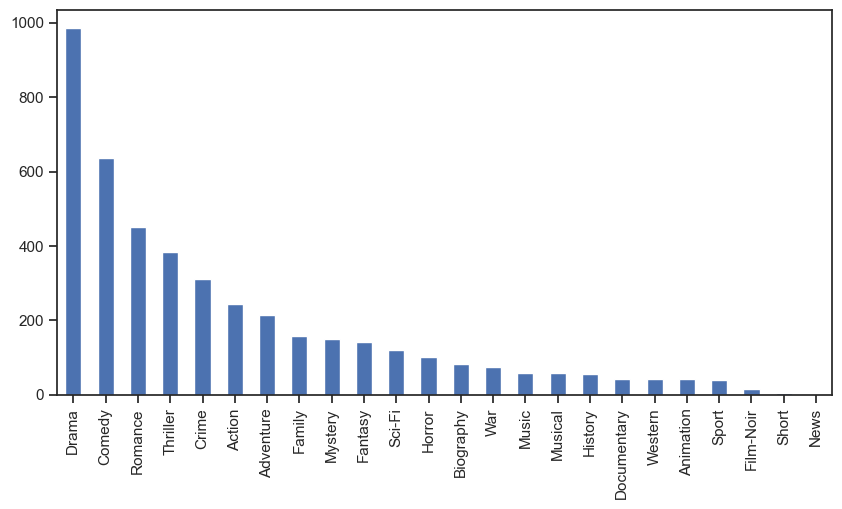

In [13]:
plot_column(movie_info , 'genre_imdb')

# Preproccesing


In [14]:
def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    stop = stopwords.words('english') + punctuation + pronouns
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens

In [15]:
# function for text cleaning
def clean_text( text):
    tokens = my_analyzer(text)
    text = ' '.join(tokens)
    return text

In [16]:
movie_info['clean_plot'] = movie_info['plot_synopsis'].apply(lambda x: clean_text(x))

In [17]:
movie_info['clean_plot']

0       boy call andy davis voice john morris use toy ...
1       story open cold war soviet union british secre...
2       film begin ted bellhop tim roth room fill hote...
3       chilli palmer john travolta loan shark live mi...
4       give guest lecture criminal psychology local u...
                              ...                        
1594    angel celebrate birth daughter take first hit ...
1595    alan jar harris schoolteacher london also moon...
1596    film follow helen quilley gwyneth paltrow youn...
1597                                                     
1598                                                     
Name: clean_plot, Length: 1599, dtype: object

In [18]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

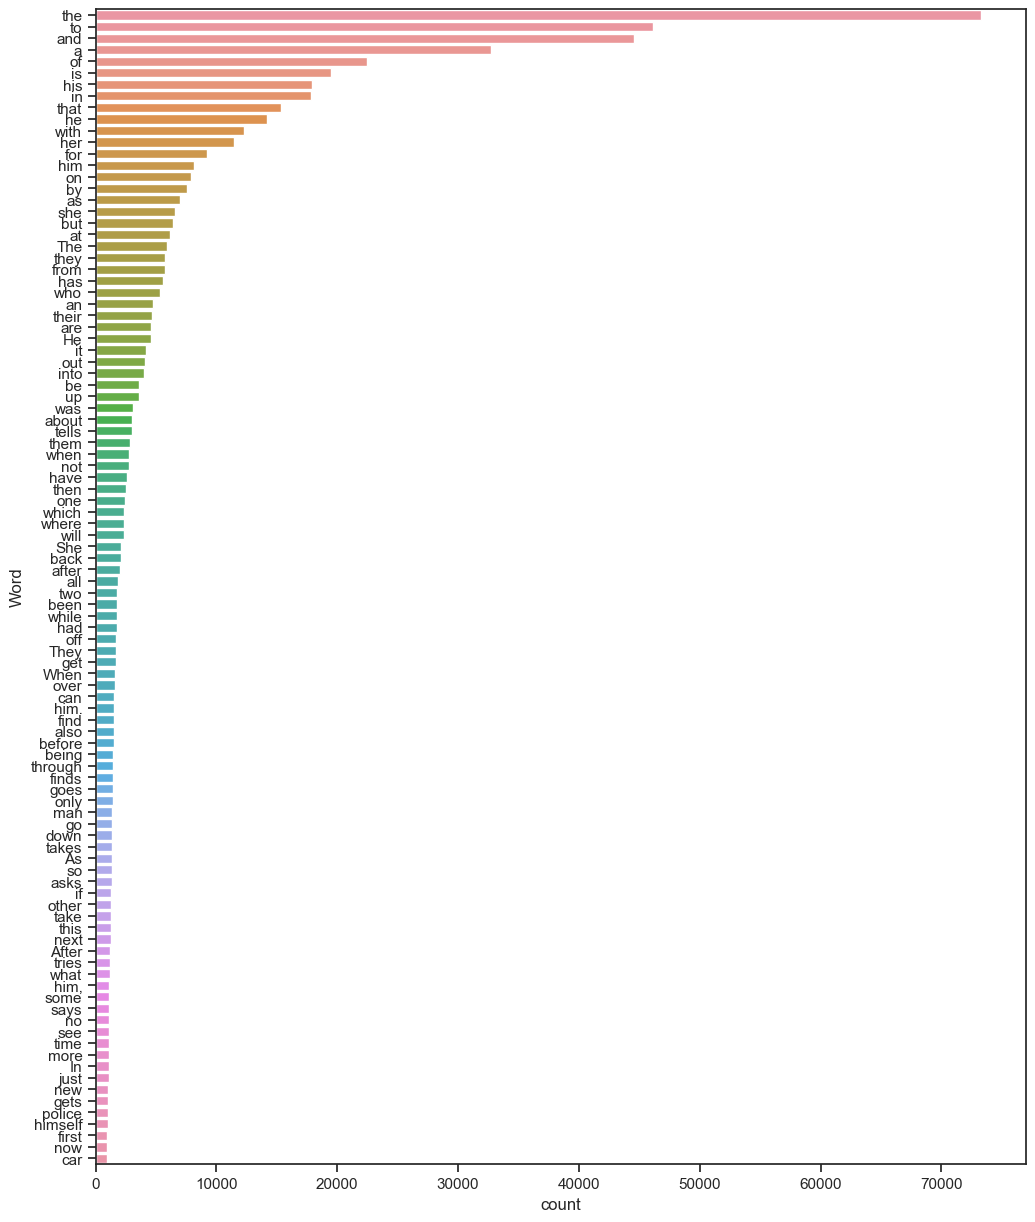

In [19]:
freq_words(movie_info['plot_synopsis'] , 100)

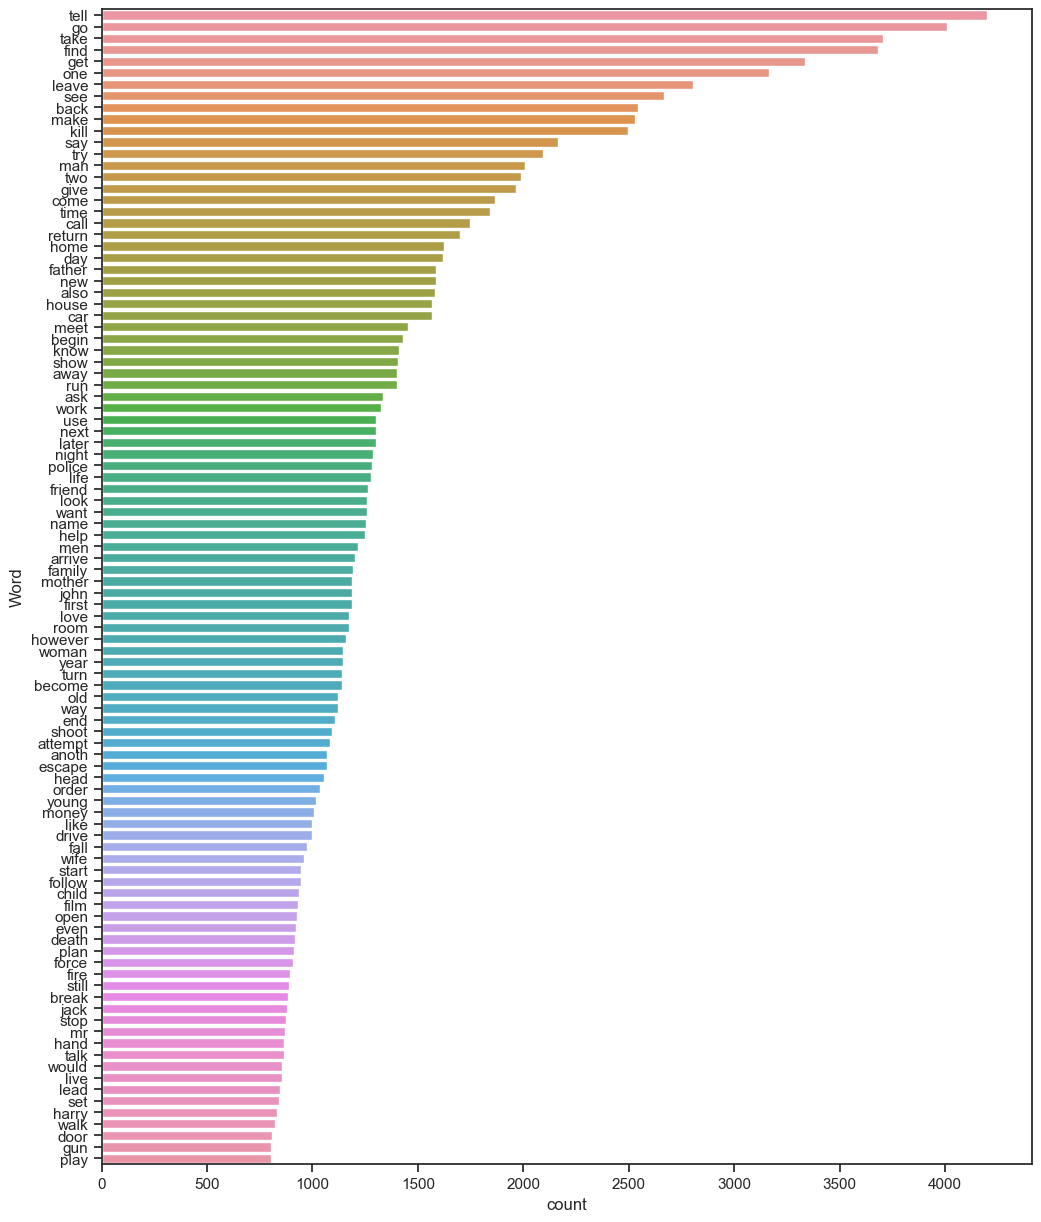

In [20]:
freq_words(movie_info['clean_plot'] , 100)

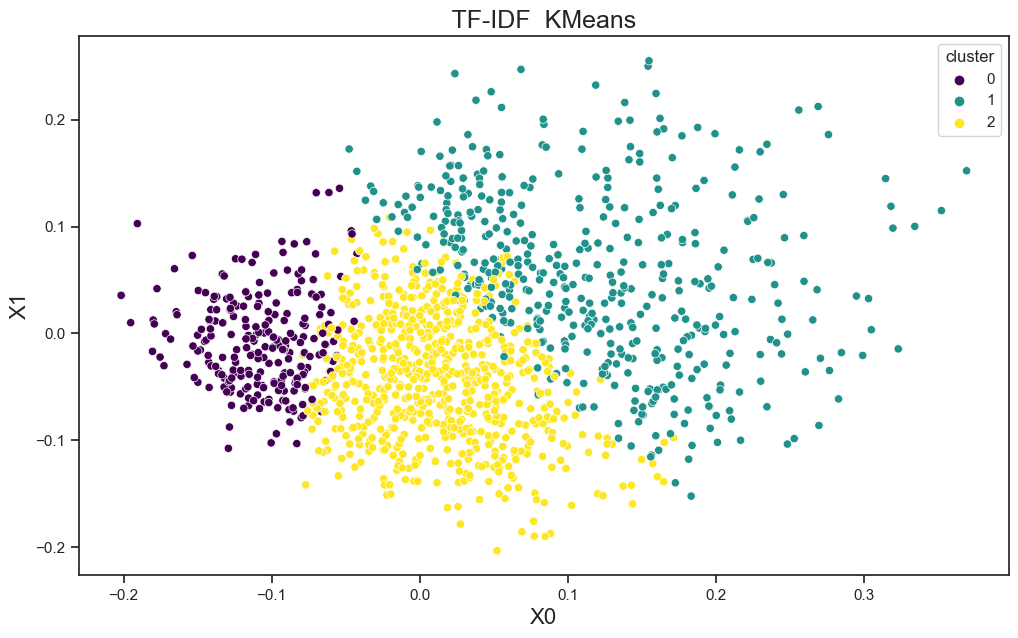

In [21]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(movie_info['clean_plot'])
# initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_

# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass X to the pca
pca_vecs = pca.fit_transform(X.toarray())
# save the two dimensions in x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# assign clusters and PCA vectors to columns in the original dataframe
movie_info['cluster'] = clusters
movie_info['x0'] = x0
movie_info['x1'] = x1

# cluster_map = {0: "sport", 1: "technology", 2: "religion"} # mapping found through get_top_keywords
# movie_info['cluster'] = movie_info['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title(" TF-IDF  KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=movie_info, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

<AxesSubplot:>

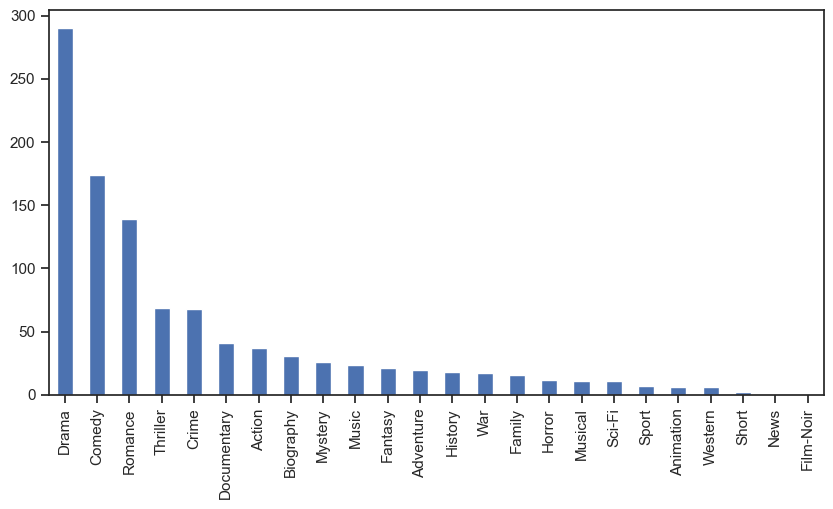

In [22]:
grouped = movie_info.groupby(movie_info.cluster)
df_cluster2 = grouped.get_group(2)
df_cluster1 = grouped.get_group(1)
df_cluster0 = grouped.get_group(0)
plot_column(df_cluster0 , 'genre_imdb')

<AxesSubplot:>

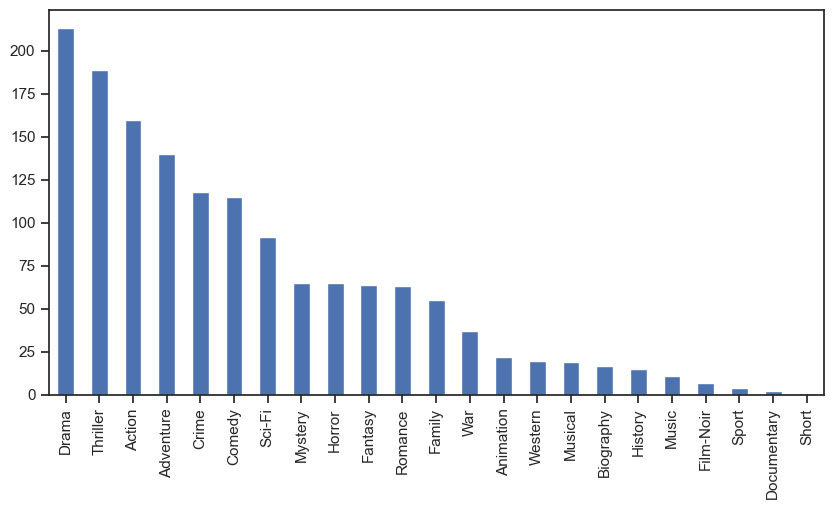

In [23]:
plot_column(df_cluster1 , 'genre_imdb')

<AxesSubplot:>

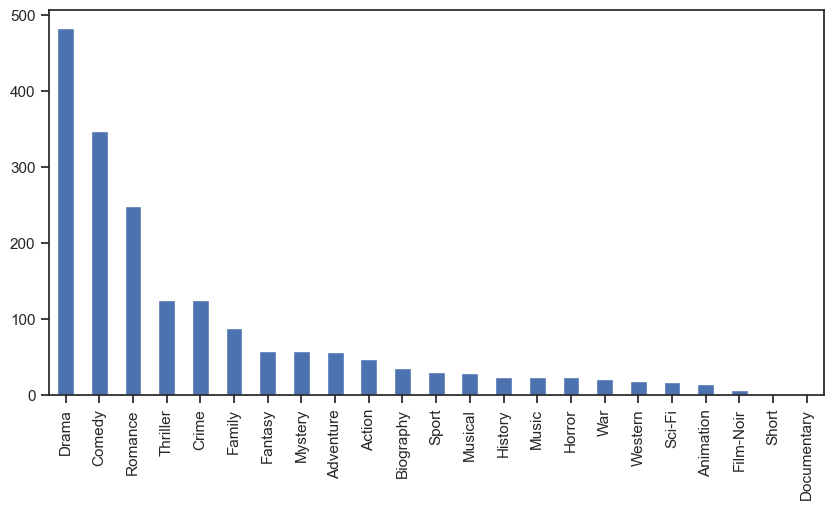

In [24]:
plot_column(df_cluster2, 'genre_imdb')